In [1]:
import selenium
from selenium import webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
from time import sleep

In [2]:
productUrl = input("Enter Product URL: ") # pass the url from searchbox here

Enter Product URL: https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/product-reviews/B09WQY65HN


In [3]:
driver = webdriver.Chrome()
driver.get(productUrl)
# add the amazon auto login code 
    


In [4]:
btn = driver.find_element(By.XPATH , '//div[@class="layoutToolbarPadding"]/a[2]') #login popup
btn.click()

ID = driver.find_element(By.XPATH ,'//input[@type="email"]') #login id/phone number
ID.send_keys("abcd@gmail.com")
sleep(10)

Continue = driver.find_element(By.XPATH , '//span[@id="continue"]') #continue
Continue.click()

Password = driver.find_element(By.XPATH ,'//input[@type="password"]') #password
Password.send_keys("1234567876")
sleep(10)

Sign_in = driver.find_element(By.XPATH , '//span[@id="auth-signin-button"]') #sign in
Sign_in.click()
sleep(20)

In [5]:
import re
asin_pattern = r'/product-reviews/([A-Z0-9]+)/?'

def product_Asin(URL):
    # Use re.search to find the pattern in the URL
    asin_pattern = r'/product-reviews/([A-Z0-9]+)/?'
    match = re.search(asin_pattern, URL)

    if match:
        # Extract the ASIN from the matched group and store it in a variable
        asin = match.group(1)
        return asin

    else:
        asin_pattern = r'/dp/([A-Z0-9]+)/?'
        match = re.search(asin_pattern, URL)
        if match:
            asin = match.group(1)
            return asin
        else:
            asin = None
            return asin
            # Handle the case where the pattern is not found

In [6]:
name = []
rating = []
review_summary = []
full_review = []
time = []
asins = []
urls = []

In [7]:
def web_scrape():
    sleep(4)
    for pages in range(1,11):
        
        ratings=driver.find_elements(By.XPATH ,'//div[@data-hook="review"]/div/div/div[2]/a/i/span')
        names = driver.find_elements(By.XPATH , '//div[@class="a-section review aok-relative"]/div/div/div/a/div[2]/span')
        times = driver.find_elements(By.XPATH , '//div[@class="a-section review aok-relative"]/div/div/span')
        reviews = driver.find_elements(By.XPATH , '//div[@class="a-section review aok-relative"]/div/div/div[2]/a/span[2]')
        full_reviews = driver.find_elements(By.XPATH , '//div[@class="a-row a-spacing-small review-data"]')
        url = driver.find_elements(By.XPATH ,'//div[@class="a-section review aok-relative"]/div/div/div[1]/a')
        asin_url=driver.find_element(By.XPATH , '//span[@class="a-list-item"]/a')
        asin = product_Asin(asin_url.get_attribute('href'))
        
        for i in range(len(names)):
            name.append(names[i].text)
            asins.append(asin)
            time.append(times[i].text)
            rating.append(ratings[i].get_attribute("textContent"))
            review_summary.append(reviews[i].text)
            full_review.append(full_reviews[i].text)
            urls.append(url[i].get_attribute('href'))
            
        if(pages < 10):
            try:
                button = driver.find_element(By.XPATH , '//li[@class="a-last"]')
            except NoSuchElementException as e:
                break
        else:
            break
            
        button.click()
        sleep(4)

In [8]:
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="5 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="4 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="3 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="2 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="1 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="Positive reviews"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="Critical reviews"]').click()
web_scrape()

In [9]:
amazon=pd.DataFrame({}) # initializing Dataframe

In [10]:
# Scraped Dataset CLEANING

In [11]:


# Extract the overall rating using the function

overall_rating=[]
review_time_str = []


# Function to extract overall rating from a string
def extract_overall_rating(input_string):
    pattern = r'(\d+\.\d+) out of 5 stars'
    match = re.search(pattern, input_string)
    return match.group(1) if match else None

for item in rating:
    overall_rating.append(extract_overall_rating(item))

# Extract and convert the review time
for t in time:
    review_time_str.append( t.strip() if time else None)

In [12]:
# Convert the review time to the desired format

unix_review_time = []
from datetime import datetime


for str_time in review_time_str:
    if str_time:
        review_time = datetime.strptime(str_time, "Reviewed in India on %d %B %Y")
        formatted_review_time = review_time.strftime("%m %d, %Y")
    else:
        formatted_review_time = None
    print(formatted_review_time)

    # Convert the formatted review time to Unix timestamp
    unix_review_time1 = int(datetime.strptime(formatted_review_time, "%m %d, %Y").timestamp())
    unix_review_time.append(unix_review_time1)

11 23, 2023
10 01, 2023
11 17, 2023
11 15, 2023
11 16, 2023
11 14, 2023
11 13, 2023
11 17, 2023
11 09, 2023
11 05, 2023
11 06, 2023
10 28, 2023
11 05, 2023
10 11, 2023
11 06, 2023
11 03, 2023
11 01, 2023
10 24, 2023
10 31, 2023
10 29, 2023
10 28, 2023
10 29, 2023
10 25, 2023
10 15, 2023
10 19, 2023
10 07, 2023
09 21, 2023
10 23, 2023
10 27, 2023
01 12, 2023
10 12, 2023
10 25, 2023
10 21, 2023
10 13, 2023
10 08, 2023
10 03, 2023
10 11, 2023
10 07, 2023
10 02, 2023
10 01, 2023
08 20, 2023
11 20, 2023
08 25, 2023
10 10, 2023
08 09, 2023
09 02, 2023
10 02, 2023
02 26, 2022
09 01, 2023
10 08, 2023
10 07, 2023
10 09, 2023
10 06, 2023
09 07, 2023
10 05, 2023
10 10, 2023
09 05, 2023
10 05, 2023
10 01, 2023
10 13, 2023
10 11, 2023
10 11, 2023
09 02, 2023
10 30, 2023
10 02, 2023
11 15, 2023
11 19, 2023
08 23, 2023
11 16, 2023
11 04, 2023
09 01, 2023
11 22, 2023
10 21, 2023
09 20, 2023
11 08, 2023
09 11, 2023
10 04, 2023
10 26, 2023
10 08, 2023
09 25, 2023
11 16, 2023
09 23, 2023
09 24, 2023
09 2

In [13]:
import re
reviewer_id = []

def extract_id_from_url(url):
    pattern = r'amzn1\.account\.(\w+)'
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    else:
        return None


for url in urls:
    extracted_id = extract_id_from_url(url)   
    reviewer_id.append(extracted_id)

In [14]:
amazon['reviewerID'] = reviewer_id
amazon['asin'] = asins
amazon['reviewerName'] = name
amazon['reviewText'] = full_review
amazon['overall'] = overall_rating
amazon['summary']  =  review_summary

amazon['reviewTime'] = str_time
amazon['unixReviewTime'] = unix_review_time


amazon #priniting review details

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,unixReviewTime
0,AHJUPQHCRXF766S7XITJRD522HQQ,B09WQY65HN,RohiT YadaV,Camera is good but not in night\nBattery is no...,4.0,Value for money,Reviewed in India on 21 July 2023,1700677800
1,AG6A536DFGUMKQVFZMKROVPQVW7Q,B09WQY65HN,Sandeep Pal,Very good and Stylish phone as compared to oth...,4.0,Very good phone in 16 K of oneplus,Reviewed in India on 21 July 2023,1696098600
2,AHXE2O5GAFN2ZWLTE6YLC27J7Y2A,B09WQY65HN,Thandava,Pros :\nBuild Quality\nCamera\nValue for money...,4.0,Good Choice,Reviewed in India on 21 July 2023,1700159400
3,AGXSZ2IOT6PLYPSV7CNR4XMNOMAA,B09WQY65HN,Sunil Kumar yadav,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,4.0,नाइट कैमरा अच्छा नहीं है पिक्चर लेने पर वीडियो...,Reviewed in India on 21 July 2023,1699986600
4,AFDKZBYEPRPUARCXAXSMWJCS6WPA,B09WQY65HN,Balram Meena,It's valuable price ok,4.0,👍,Reviewed in India on 21 July 2023,1700073000
...,...,...,...,...,...,...,...,...
795,AHAEKH3Q3UEOXINAIGBZCPFYCXFA,B09WQY65HN,kremil modi,OnePlus Nord CE 5G is an excellent mid-range p...,3.0,"""Experience the new 5G speed with OnePlus Nord...",Reviewed in India on 21 July 2023,1672338600
796,AEJMEIL7UHT26TQAYS5MBUNJ2N7Q,B09WQY65HN,rohit ramdas mahadwar,"Camera is disappointed me Day and night, proce...",3.0,Overall mobile,Reviewed in India on 21 July 2023,1689705000
797,AEYGZYBWHJ2TXUG3OBRRQNOONMQQ,B09WQY65HN,Dipendra shahi,Mobile is good but some time heating problem.,3.0,Oneplus nord ce2 5g,Reviewed in India on 21 July 2023,1689186600
798,AFURZMY5VTUCTERWSQ24NQAHAQZA,B09WQY65HN,Manish Saini,Camera is not Good..,3.0,Camera,Reviewed in India on 21 July 2023,1689359400


In [15]:
# storing scraped data into a csv file

amazon.to_csv("Amazon_dataset2023.csv",encoding = 'utf8', index = False)

In [16]:
# Importing Libraries and Datasets

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data = pd.read_csv('Amazon_dataset2023.csv')
data.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,unixReviewTime
0,AHJUPQHCRXF766S7XITJRD522HQQ,B09WQY65HN,RohiT YadaV,Camera is good but not in night\nBattery is no...,4.0,Value for money,Reviewed in India on 21 July 2023,1700677800
1,AG6A536DFGUMKQVFZMKROVPQVW7Q,B09WQY65HN,Sandeep Pal,Very good and Stylish phone as compared to oth...,4.0,Very good phone in 16 K of oneplus,Reviewed in India on 21 July 2023,1696098600
2,AHXE2O5GAFN2ZWLTE6YLC27J7Y2A,B09WQY65HN,Thandava,Pros :\nBuild Quality\nCamera\nValue for money...,4.0,Good Choice,Reviewed in India on 21 July 2023,1700159400
3,AGXSZ2IOT6PLYPSV7CNR4XMNOMAA,B09WQY65HN,Sunil Kumar yadav,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,4.0,नाइट कैमरा अच्छा नहीं है पिक्चर लेने पर वीडियो...,Reviewed in India on 21 July 2023,1699986600
4,AFDKZBYEPRPUARCXAXSMWJCS6WPA,B09WQY65HN,Balram Meena,It's valuable price ok,4.0,👍,Reviewed in India on 21 July 2023,1700073000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      800 non-null    object 
 1   asin            800 non-null    object 
 2   reviewerName    800 non-null    object 
 3   reviewText      793 non-null    object 
 4   overall         800 non-null    float64
 5   summary         800 non-null    object 
 6   reviewTime      800 non-null    object 
 7   unixReviewTime  800 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 50.1+ KB


In [20]:
 # SENTIMENT ANALYSIS of Product Reviews

In [21]:
data.dropna(inplace=True) #dropping null values

In [22]:

# Assigning sentiment based on review scores
data["Sentiment"] = data["overall"].apply(lambda score: "positive" if score >= 4 else "neutral" if score == 3 else "negative")
data['Sentiment'] = data['Sentiment'].map({'positive': 1, 'neutral': 2, 'negative': 0})

data.shape

(793, 9)

In [23]:
# Drop duplicates
data.drop_duplicates(inplace=True)
data.shape

(498, 9)

In [24]:
#clean the review column by removing the stopwords

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def clean_review_text(review):
    clean_review = " ".join(word for word in review.split() if word not in stop_words)
    return clean_review

data['reviewText'] = data['reviewText'].apply(clean_review_text)

In [25]:
data.head(500)

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,unixReviewTime,Sentiment
0,AHJUPQHCRXF766S7XITJRD522HQQ,B09WQY65HN,RohiT YadaV,Camera good night Battery performing 5000mah O...,4.0,Value for money,Reviewed in India on 21 July 2023,1700677800,1
1,AG6A536DFGUMKQVFZMKROVPQVW7Q,B09WQY65HN,Sandeep Pal,Very good Stylish phone compared phones functi...,4.0,Very good phone in 16 K of oneplus,Reviewed in India on 21 July 2023,1696098600,1
2,AHXE2O5GAFN2ZWLTE6YLC27J7Y2A,B09WQY65HN,Thandava,Pros : Build Quality Camera Value money Batter...,4.0,Good Choice,Reviewed in India on 21 July 2023,1700159400,1
3,AGXSZ2IOT6PLYPSV7CNR4XMNOMAA,B09WQY65HN,Sunil Kumar yadav,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,4.0,नाइट कैमरा अच्छा नहीं है पिक्चर लेने पर वीडियो...,Reviewed in India on 21 July 2023,1699986600,1
4,AFDKZBYEPRPUARCXAXSMWJCS6WPA,B09WQY65HN,Balram Meena,It's valuable price ok,4.0,👍,Reviewed in India on 21 July 2023,1700073000,1
...,...,...,...,...,...,...,...,...,...
597,AE5ZQBKJJ7LWIQYUQBMLZKCOEZIA,B09WQY65HN,M Viditha,🙏pls buy product really waste money......... N...,1.0,Very bad 😞,Reviewed in India on 21 July 2023,1685644200,0
598,AE67XPWSJ5WS7GKQGRQAKDJBQZPQ,B09WQY65HN,amit kandiyal,1. Poor camera(1080p photo available in3:4 mod...,1.0,Not worth,Reviewed in India on 21 July 2023,1692124200,0
599,AHG64B6EJLU5ZBMCEFHH5P4K4OKQ,B09WQY65HN,keshav,हम आपके प्राइम मेम्बर है इतनी खरीददारी करते है...,1.0,Scammer,Reviewed in India on 21 July 2023,1690223400,0
692,AHY3QEQW76YRRIJ2ALZ5SH2N4BWQ,B09WQY65HN,Rahis Kumar,Play Video Gajab 👌 phone 📱,4.0,Lajabab phone 🤳📱,Reviewed in India on 21 July 2023,1697394600,1


In [26]:
# Analysis of the Dataset

data['Sentiment'].value_counts()

1    201
0    198
2     99
Name: Sentiment, dtype: int64

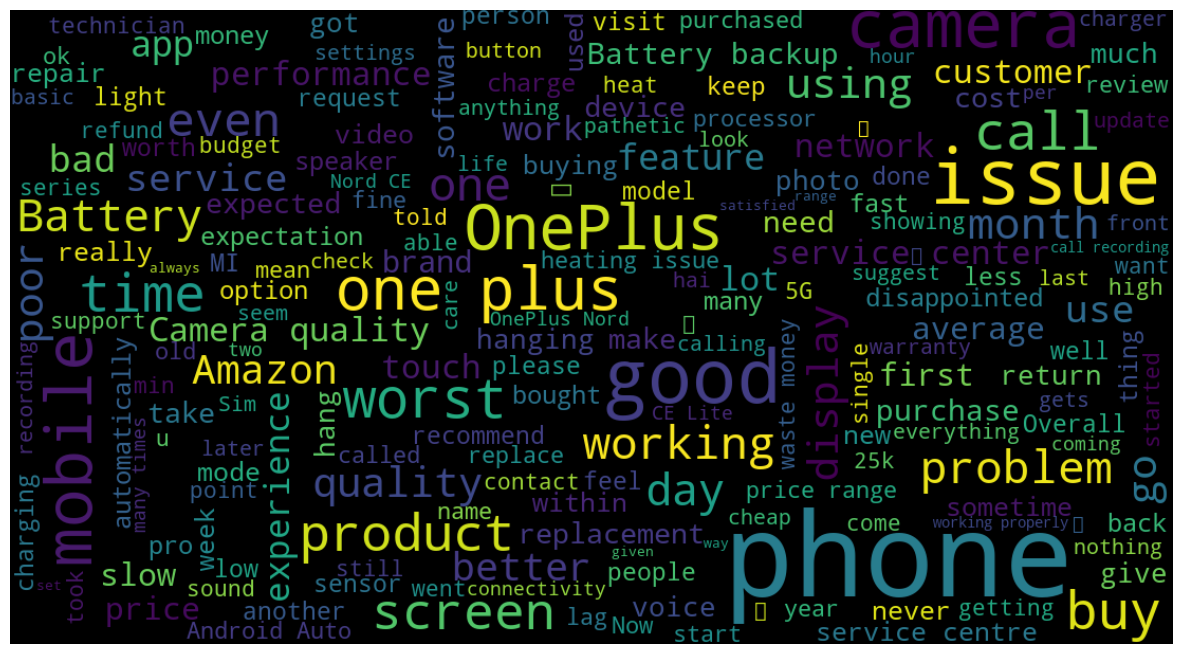

In [27]:
# Wordcloud of all the words with sentiment = 0 i.e. negative
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing review text and sentiment labels

negative_reviews = ' '.join(word for word in data['reviewText'][data['Sentiment'] == 0].astype(str))
wordcloud = WordCloud(width=1100, height=600, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(negative_reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


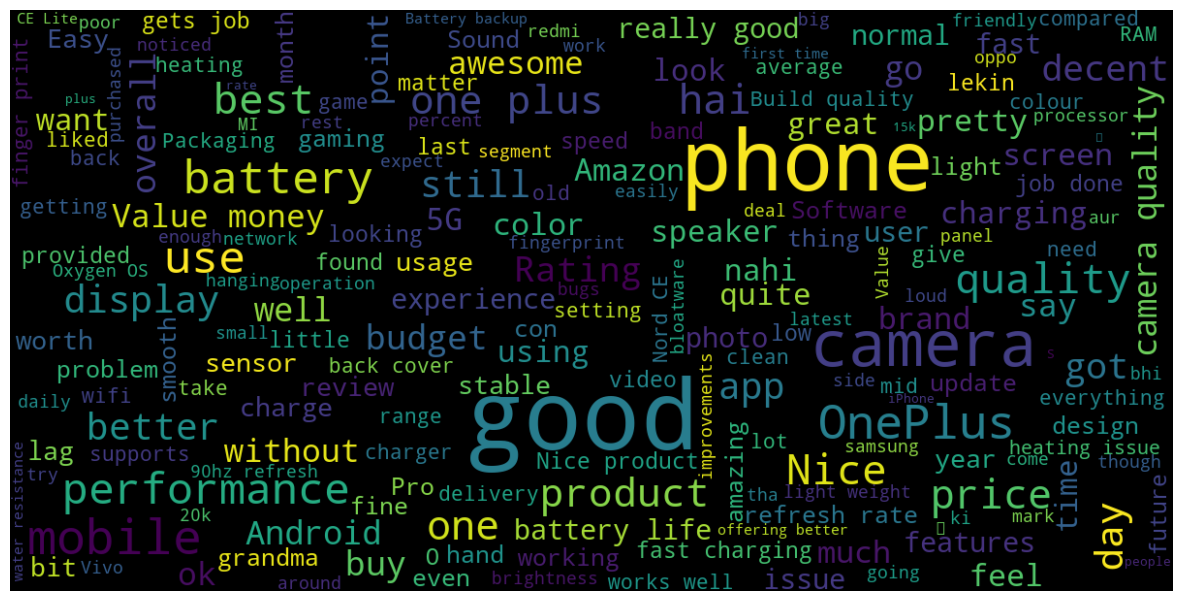

In [28]:
# Wordcloud of all the words with sentiment = 1 i.e. positive

# Assuming 'data' is a DataFrame containing review text and sentiment labels

positive_reviews = ' '.join(word for word in data['reviewText'][data['Sentiment'] == 1].astype(str))
wordcloud_negative = WordCloud(width=1200, height=600, random_state=21, max_font_size=100)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative.generate(positive_reviews), interpolation='bilinear')
plt.axis('off')
plt.show()



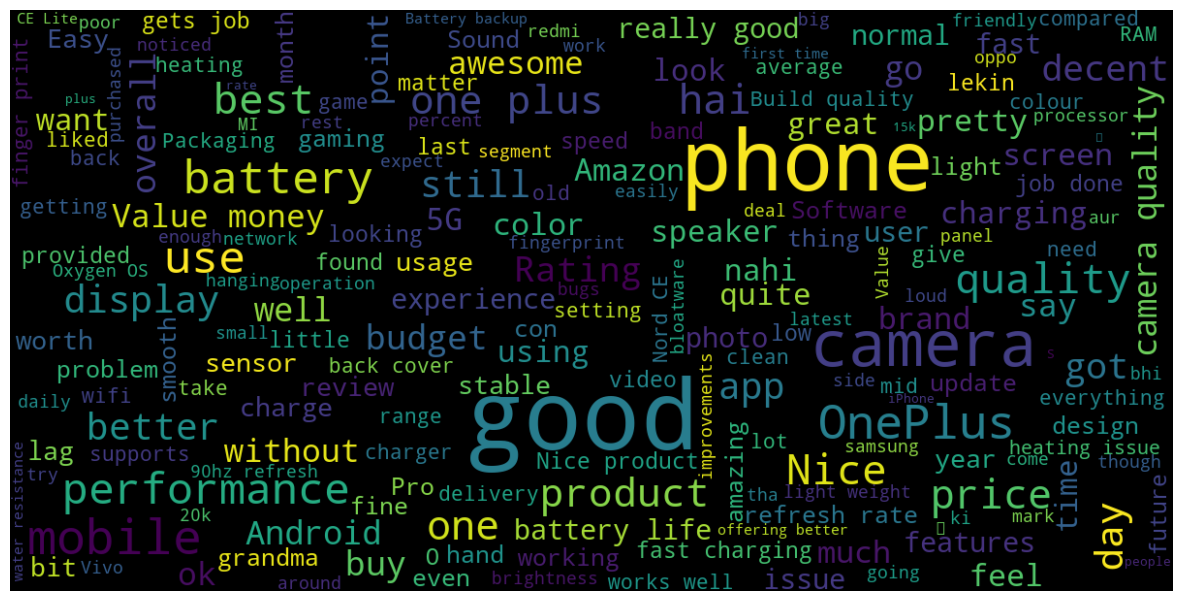

In [29]:
# Wordcloud of all the words with sentiment = 2 i.e. neutral

neutral_reviews = ' '.join(word for word in data['reviewText'][data['Sentiment'] == 1].astype(str))
wordcloud_negative = WordCloud(width=1200, height=600, random_state=21, max_font_size=100)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative.generate(neutral_reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# Converting text into Vectors

In [31]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['reviewText'] ).toarray()

In [32]:
# Model training, Evaluation, and Prediction

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [34]:
# model training using Logistic Regression.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
# Assuming 'data' is a DataFrame containing 'reviewText' and 'Sentiment' columns

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_tfidf = tfidf_vectorizer.fit_transform(data['reviewText']).toarray()

In [37]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['Sentiment'],
                                                    test_size=0.25, random_state=42)


In [38]:
# Logistic Regression model
logistic_model = LogisticRegression()

In [39]:
# Model fitting
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [40]:
# Testing the model
predictions = logistic_model.predict(X_test)

In [41]:
# Model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.664


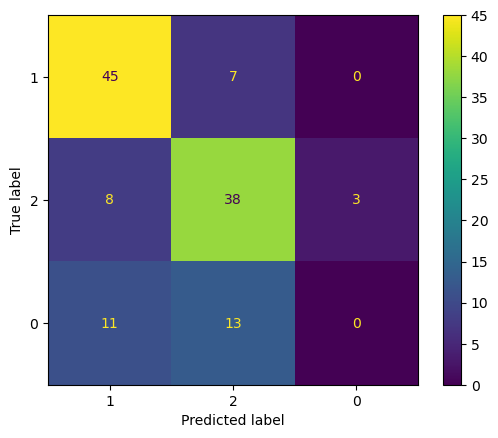

In [42]:
# Confusion matrix
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, predictions)

# Get unique classes in the test data 
# number of unique classes and the labels used for display. 
# three sentiment classes (0, 1, 2)
unique_classes_test = data['Sentiment'].unique()

# Plot confusion matrix with the correct labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes_test)
cm_display.plot()
plt.show()